In [1]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

In [2]:
train_dataset = pd.read_csv("./dataset/my_train_features.csv")
test_dataset = pd.read_csv("./dataset/my_test_features.csv")

In [3]:
classes = train_dataset.personality.unique()
classes

array(['Agreeableness', 'Conscientiousness', 'Extraversion',
       'Neuroticism', 'Openness'], dtype=object)

In [4]:
target = {
    target_class: key
    for key, target_class in enumerate(classes)
}
target

{'Agreeableness': 0,
 'Conscientiousness': 1,
 'Extraversion': 2,
 'Neuroticism': 3,
 'Openness': 4}

In [5]:
train_dataset.personality = train_dataset.personality.map(target)
test_dataset.personality = test_dataset.personality.map(target)

In [7]:
letter_slant_mapping = {'backward': -1, 'forward': 1, 'vertical': 0}
line_slant_mapping = {'lowerside': -1, 'baseline': 0, 'upperside': 1}
margin_slope_mapping = {'left': -1, 'straight': 0, 'right': 1}
word_spacing_mapping = {'small': -1, 'medium': 0, 'large': 1}

In [8]:
train_dataset["letter_slant"] = train_dataset["letter_slant"].map(letter_slant_mapping)
train_dataset["line_slant"] = train_dataset["line_slant"].map(line_slant_mapping)
train_dataset["margin_slope"] = train_dataset["margin_slope"].map(margin_slope_mapping)
train_dataset["word_spacing"] = train_dataset["word_spacing"].map(word_spacing_mapping)
test_dataset["letter_slant"] = test_dataset["letter_slant"].map(letter_slant_mapping)
test_dataset["line_slant"] = test_dataset["line_slant"].map(line_slant_mapping)
test_dataset["margin_slope"] = test_dataset["margin_slope"].map(margin_slope_mapping)
test_dataset["word_spacing"] = test_dataset["word_spacing"].map(word_spacing_mapping)

In [9]:
train_dataset.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,-1,1,1307.2,0,-1,0
1,-1,1,932.0,1,-1,0
2,1,1,891.4,0,-1,0
3,1,1,279.6,0,-1,0
4,0,1,766.0,0,-1,0


In [10]:
x_train = []
y_train = []

for i in range(train_dataset.shape[0]):
    x_train.append([train_dataset['letter_slant'][i],
                    train_dataset['line_slant'][i],
                    train_dataset['letter_size'][i],
                    train_dataset['margin_slope'][i],
                    train_dataset['word_spacing'][i]])
    y_train.append([train_dataset['personality'][i]])

x_test = []
y_test = []

for i in range(test_dataset.shape[0]):
    x_test.append([test_dataset['letter_slant'][i],
                    test_dataset['line_slant'][i],
                    test_dataset['letter_size'][i],
                    test_dataset['margin_slope'][i],
                    test_dataset['word_spacing'][i]])
    y_test.append([test_dataset['personality'][i]])

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

d:\Study\MCA KU\MCA Project\ML_Project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,629 (10.27 KB)

 Trainable params: 2,629 (10.27 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
epoch = 100
history = model.fit(x_train, y_train, epochs=epoch, batch_size=16, verbose=0)

In [19]:
model.evaluate(x_train, y_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3309 - loss: 1.8942  


[1.9135534763336182, 0.22033898532390594]

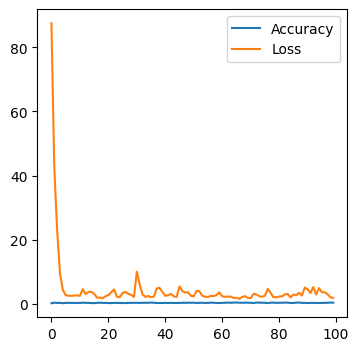

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.plot(range(epoch), history.history['accuracy'], label="Accuracy")
plt.plot(range(epoch), history.history['loss'], label="Loss")
plt.legend(loc="best")
plt.show()

In [21]:
model.predict(np.array([x_test[1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[0.30364132, 0.05460409, 0.26783577, 0.1078102 , 0.26610854]],
      dtype=float32)